<a href="https://colab.research.google.com/github/berkyyd/Projects/blob/main/nobel_uyg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [ ]:
# award_won değişkeni oluşturuluyor (bu örnekte, Nobel kazanmışsa 1, kazanmadıysa 0)
df['award_won'] = df['prize'].apply(lambda x: 1 if x != 'Unknown' else 0)

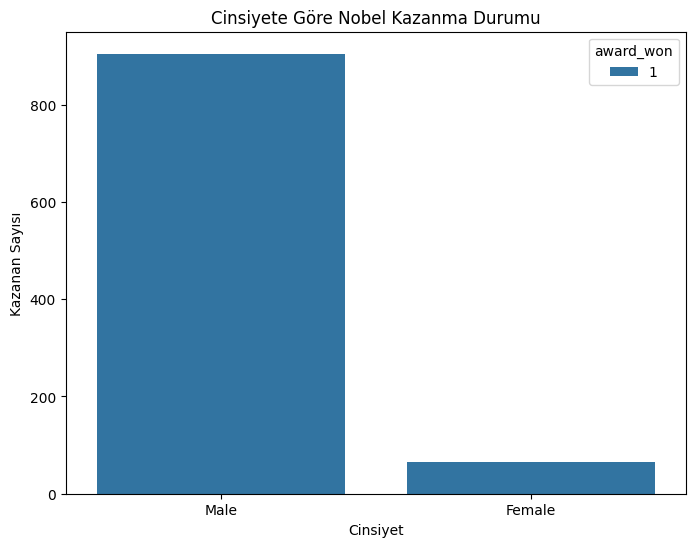

In [ ]:
# Cinsiyete göre Nobel kazanma durumu
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='award_won', data=df)
plt.title('Cinsiyete Göre Nobel Kazanma Durumu')
plt.xlabel('Cinsiyet')
plt.ylabel('Kazanan Sayısı')
plt.show()


<ipython-input-22-4f1e6edfd50b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


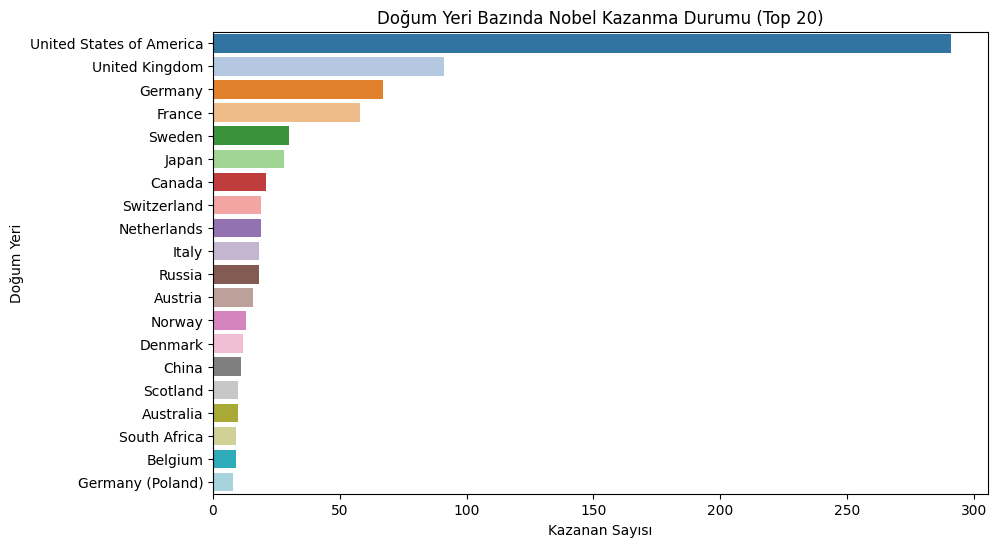

In [ ]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("tab20", n_colors=20)  # 20 farklı renk belirle

sns.countplot(
    y='birth_country',
    hue=None,  # Her bar farklı renkte olacak
    data=df,
    palette=colors,
    order=df['birth_country'].value_counts().index[:20]  # En çok kazanan 20 ülke
)

plt.title('Doğum Yeri Bazında Nobel Kazanma Durumu (Top 20)')
plt.xlabel('Kazanan Sayısı')
plt.ylabel('Doğum Yeri')
plt.show()


<ipython-input-20-fb47f800ccff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


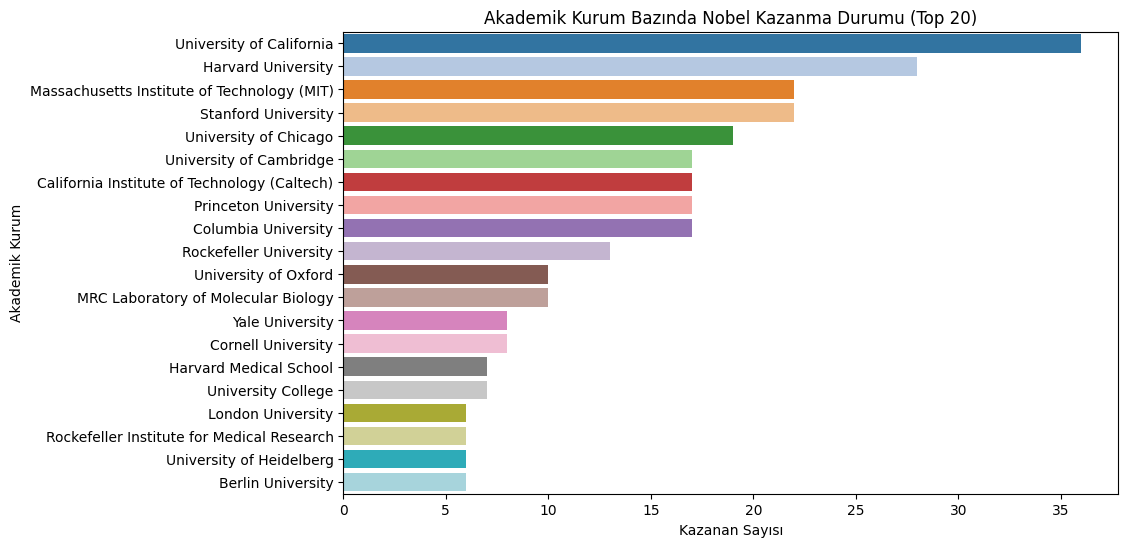

In [ ]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("tab20", n_colors=20)  # Her bar için farklı renk

sns.countplot(
    y='organization_name',
    hue=None,  # Her bar kendi rengini alacak, award_won ayrımı olmayacak
    data=df,
    palette=colors,
    order=df['organization_name'].value_counts().index[:20]
)

plt.title('Akademik Kurum Bazında Nobel Kazanma Durumu (Top 20)')
plt.xlabel('Kazanan Sayısı')
plt.ylabel('Akademik Kurum')
plt.show()


In [ ]:
# Cinsiyet bazlı düşük Nobel kazanma olasılığına sahip etiketleme
df['low_win_probability'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
# Doğum yeri bazında Nobel kazanan sayısı
top_countries = df['birth_country'].value_counts().head(10)  # Nobel kazananların en çok çıktığı ilk 10 ülke

# Nobel kazananları fazla olan ülkeleri '1', diğerlerini '0' olarak etiketleme
df['low_win_probability'] = df['birth_country'].apply(
    lambda x: 1 if x in top_countries.index else 0)

# Akademik kuruma göre Nobel kazanan sayısı
top_institutions = df['organization_name'].value_counts().head(20)  # İlk 20 Nobel kazanan kurum

# Nobel kazananı fazla olan kurumları '1', diğerlerini '0' olarak etiketleme
df['low_win_probability'] = df['organization_name'].apply(
    lambda x: 1 if x in top_institutions.index else 0)


In [ ]:
# Cinsiyet, doğum yeri ve akademik kurum bazında etiketleme
def assign_low_win_probability(row):
    # Eğer cinsiyet, doğum yeri veya kurumdan herhangi birinde kazanma olasılığı düşükse 0 etiketle
    if row['sex'] == 'female' or row['birth_country'] not in top_countries.index or row['organization_name'] not in top_institutions.index:
        return 0
    return 1

# Yeni etiketleme kolonunu oluştur
df['low_win_probability'] = df.apply(assign_low_win_probability, axis=1)


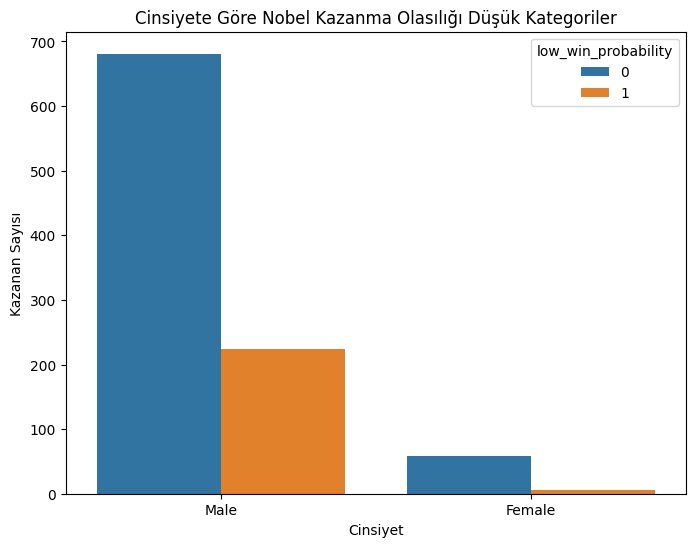

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='low_win_probability', data=df)
plt.title('Cinsiyete Göre Nobel Kazanma Olasılığı Düşük Kategoriler')
plt.xlabel('Cinsiyet')
plt.ylabel('Kazanan Sayısı')
plt.show()


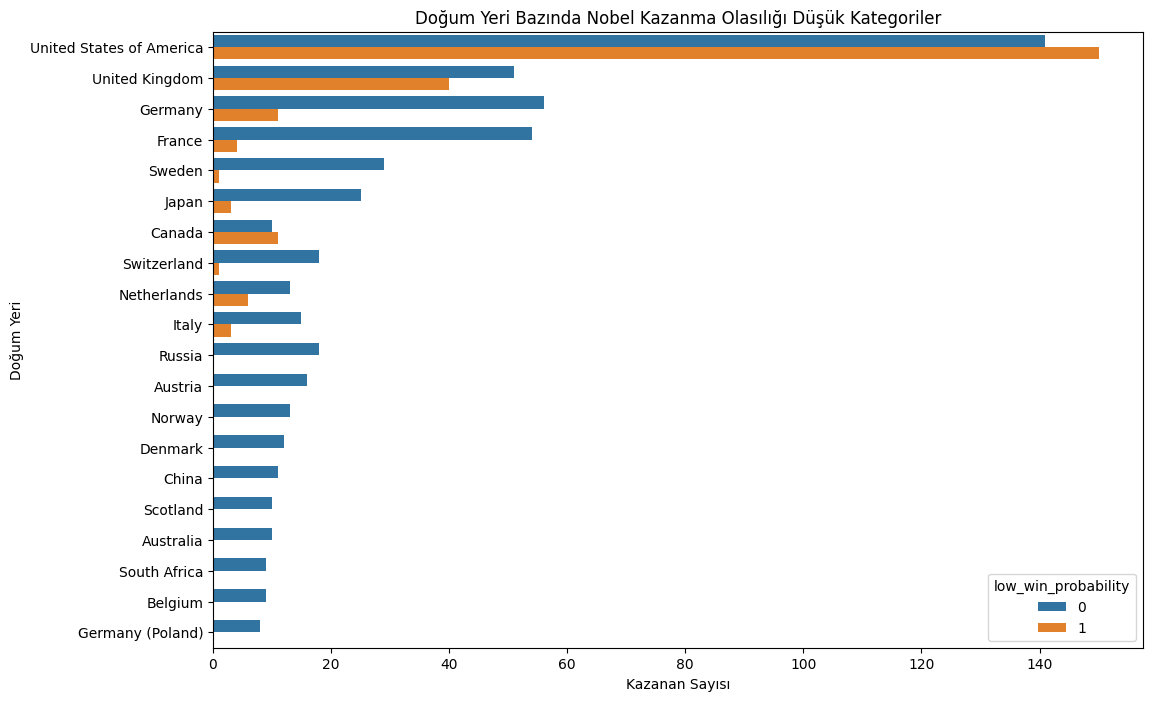

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='birth_country', hue='low_win_probability', data=df, order=df['birth_country'].value_counts().index[:20])
plt.title('Doğum Yeri Bazında Nobel Kazanma Olasılığı Düşük Kategoriler')
plt.xlabel('Kazanan Sayısı')
plt.ylabel('Doğum Yeri')
plt.show()


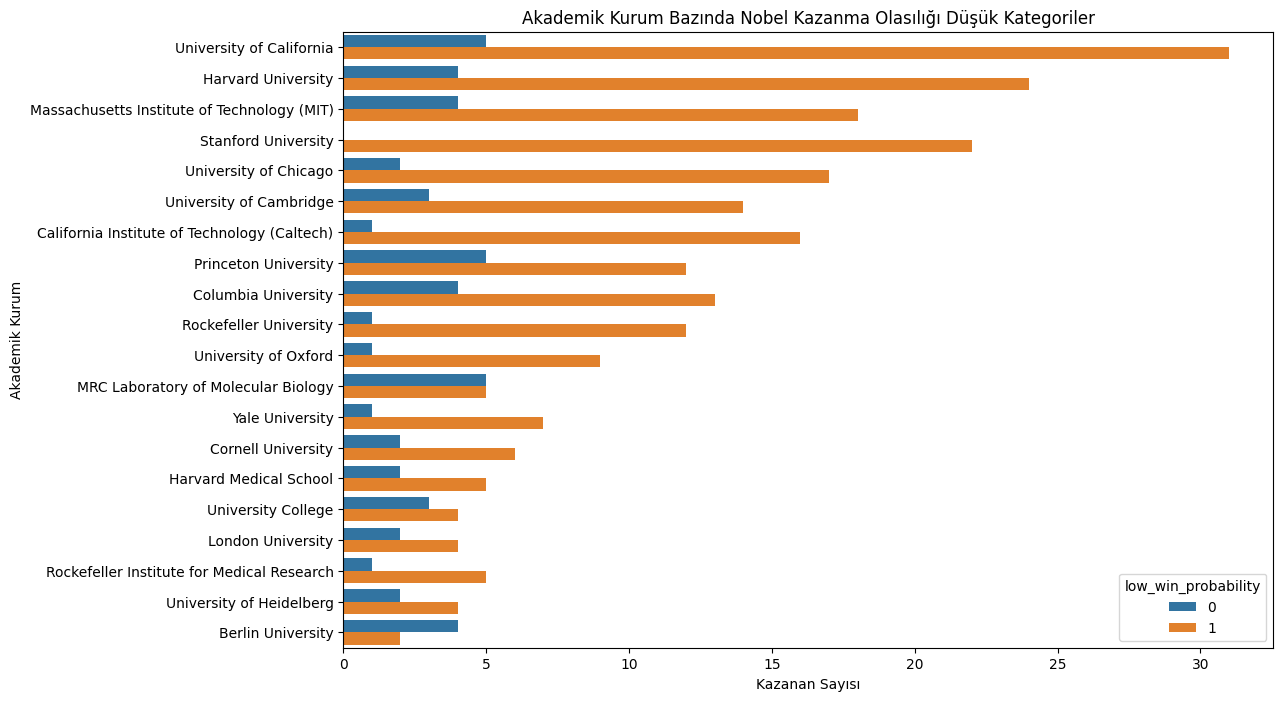

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='organization_name', hue='low_win_probability', data=df, order=df['organization_name'].value_counts().index[:20])
plt.title('Akademik Kurum Bazında Nobel Kazanma Olasılığı Düşük Kategoriler')
plt.xlabel('Kazanan Sayısı')
plt.ylabel('Akademik Kurum')
plt.show()


In [ ]:
df['low_win_probability'].value_counts()

,count
low_win_probability,
0,770
1,230


Veri Keşfi

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')
  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols

Observations: 1000
Variables: 20
cat_cols: 6
num_cols: 2
cat_but_car: 12
num_but_cat: 2


(['category',
  'prize_share',
  'laureate_type',
  'sex',
  'award_won',
  'low_win_probability'],
 ['year', 'laureate_id'])

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

check_outlier(df, num_cols)

False

In [ ]:
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

missing_values_table(df)

                      n_miss  ratio
death_city               421   42.1
death_country            415   41.5
death_date               404   40.4
organization_city        265   26.5
organization_country     265   26.5
organization_name        264   26.4
motivation                88    8.8
birth_city                36    3.6
birth_date                32    3.2
birth_country             31    3.1
sex                       30    3.0


In [ ]:
# 'death_*' sütunlarını silmek
df.drop(columns=[col for col in df.columns if col.startswith('death_')], inplace=True)


In [ ]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,award_won,low_win_probability
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1,1
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1,0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1,0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1,0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1,0


In [ ]:
# Convert 'birth_date' column to datetime objects
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Extract the year from the 'birth_date' column
df['birth_year'] = df['birth_date'].dt.year

# Calculate 'nobel_age' using the extracted birth year
df['nobel_age'] = df['year'] - df['birth_year']

# Drop the temporary 'birth_year' column if needed
df.drop(columns=['birth_year'], inplace=True)

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,award_won,low_win_probability,nobel_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1,1,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1,0,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1,0,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1,0,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1,0,79.0


In [ ]:
# Kategorik değişkenlerde "unknown" ile doldur
df['organization_city'].fillna('unknown', inplace=True)
df['organization_country'].fillna('unknown', inplace=True)
df['organization_name'].fillna('unknown', inplace=True)
df['motivation'].fillna('unknown', inplace=True)
df['birth_city'].fillna('unknown', inplace=True)
df['birth_date'].fillna('unknown', inplace=True)
df['birth_country'].fillna('unknown', inplace=True)
df['sex'].fillna('unknown', inplace=True)


In [ ]:
df['nobel_age'] = df['nobel_age'].fillna(df['nobel_age'].mean())

In [ ]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


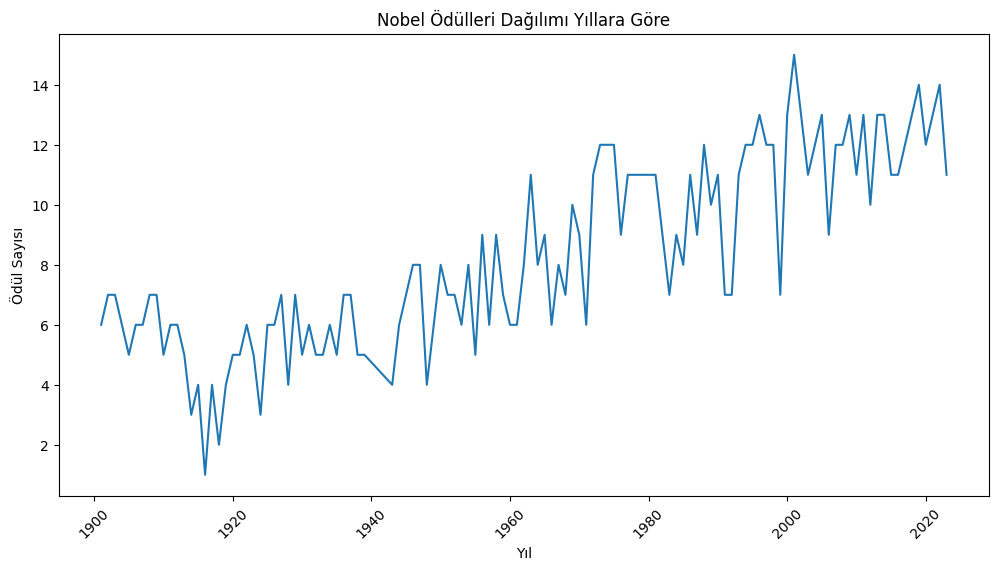

In [ ]:
# Yıllara göre ödül sayısını hesaplayalım
nobel_by_year = df['year'].value_counts().sort_index()

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.lineplot(x=nobel_by_year.index, y=nobel_by_year.values)
plt.title('Nobel Ödülleri Dağılımı Yıllara Göre')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45)
plt.show()


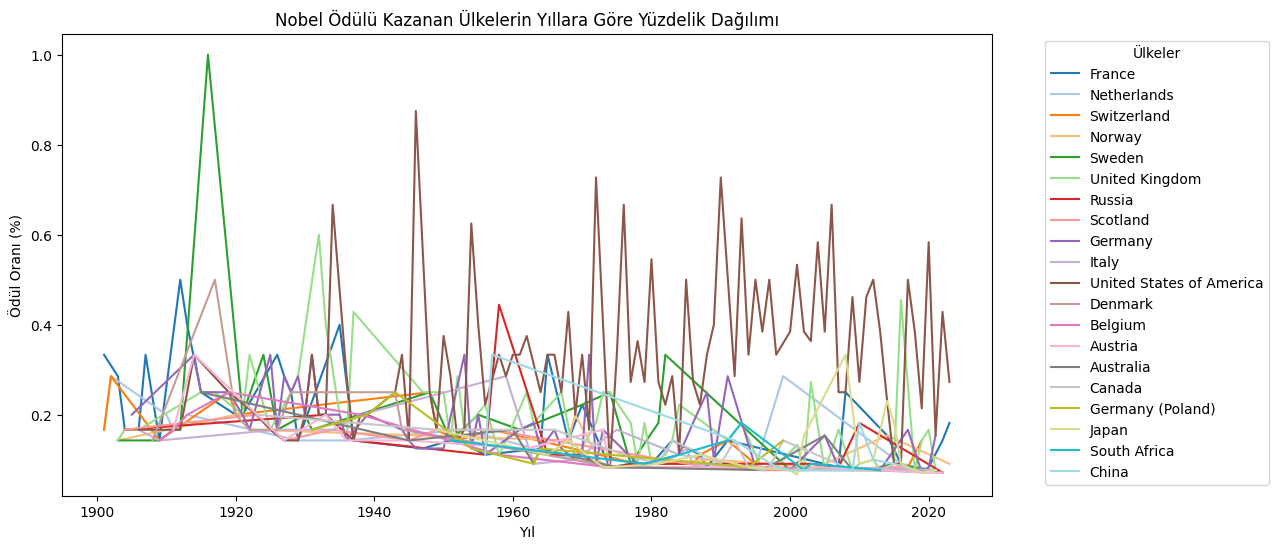

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Yıllık ödül kazanan ülke sayılarını hesapla
yearly_counts = df.groupby("year")["birth_country"].value_counts(normalize=True).rename("percentage").reset_index()

# En çok ödül kazanan 20 ülkeyi seç
top_20_countries = df[df['birth_country'] != 'unknown']['birth_country'].value_counts().head(20).index
filtered_df = yearly_counts[yearly_counts["birth_country"].isin(top_20_countries)]

# Grafik
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="year", y="percentage", hue="birth_country", palette="tab20")

plt.title("Nobel Ödülü Kazanan Ülkelerin Yıllara Göre Yüzdelik Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Ödül Oranı (%)")
plt.legend(title="Ülkeler", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<ipython-input-63-70d7e3f6bd4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_countries_total.values, y=top_20_countries_total.index, palette="tab20")


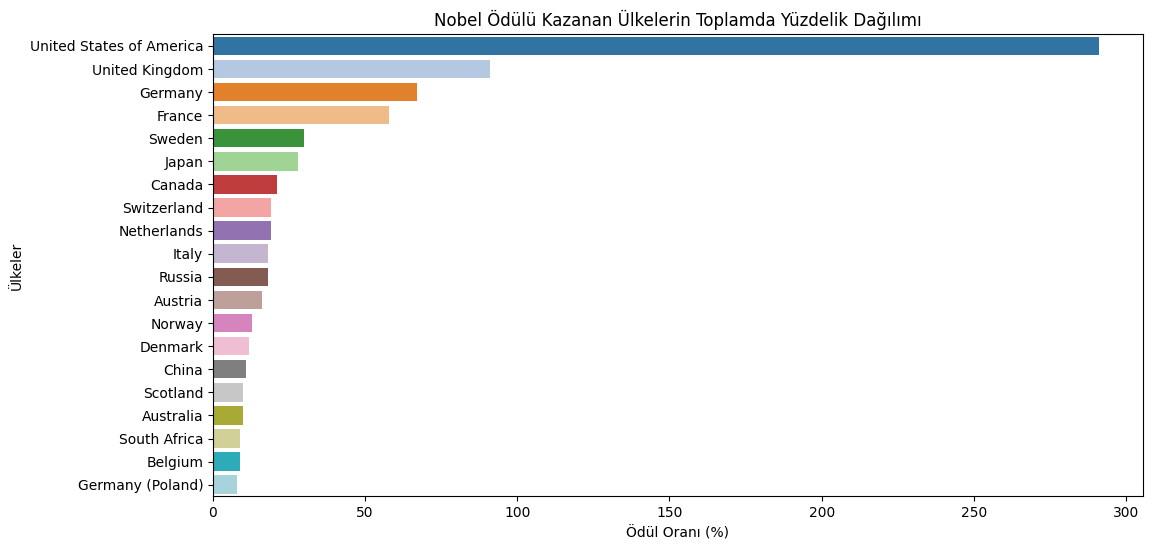

In [ ]:
# En çok ödül kazanan 20 ülkeyi seç ve yüzdelik gösterim yap
top_20_countries_total = df[df['birth_country'] != 'unknown']['birth_country'].value_counts().head(20)

# Grafik
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_countries_total.values, y=top_20_countries_total.index, palette="tab20")

plt.title("Nobel Ödülü Kazanan Ülkelerin Toplamda Yüzdelik Dağılımı")
plt.xlabel("Ödül Oranı (%)")
plt.ylabel("Ülkeler")
plt.show()


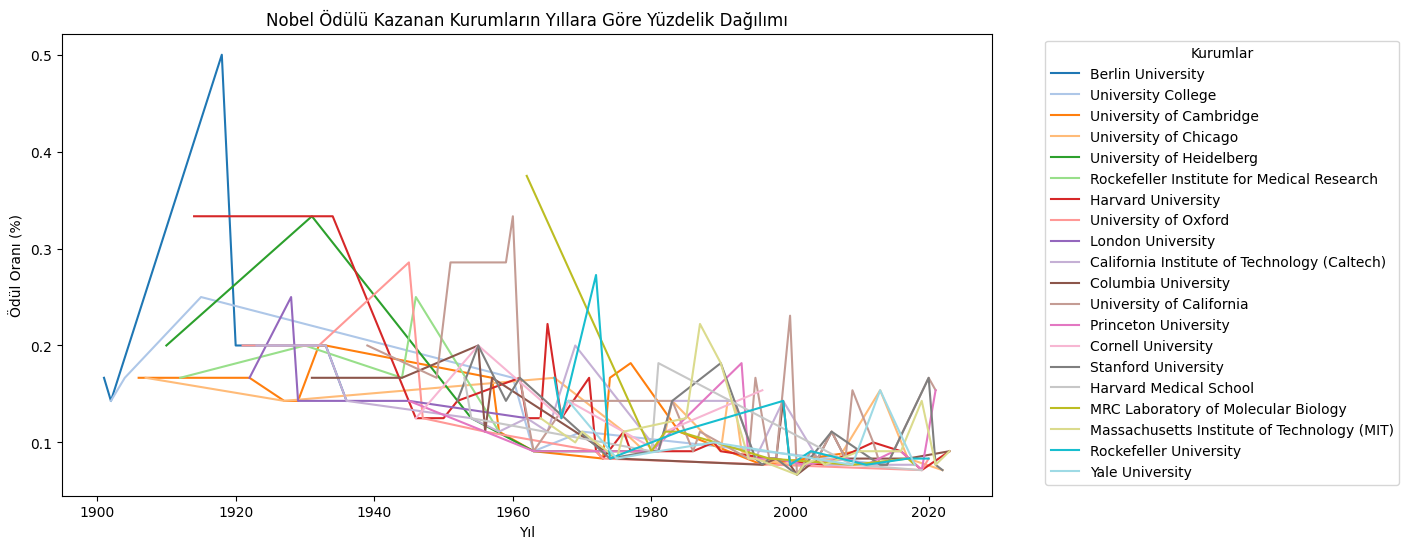

In [ ]:
# Yıllık ödül kazanan kurum sayılarını hesapla
yearly_counts = df.groupby("year")["organization_name"].value_counts(normalize=True).rename("percentage").reset_index()

# En çok ödül kazanan 20 kurumu seç
top_20_organizations = df[df['organization_name'] != 'unknown']['organization_name'].value_counts().head(20).index
filtered_df = yearly_counts[yearly_counts["organization_name"].isin(top_20_countries)]

# Grafik
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="year", y="percentage", hue="organization_name", palette="tab20")

plt.title("Nobel Ödülü Kazanan Kurumların Yıllara Göre Yüzdelik Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Ödül Oranı (%)")
plt.legend(title="Kurumlar", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<ipython-input-65-dfb6d0f18382>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_organization_total.values, y=top_20_organization_total.index, palette="tab20")


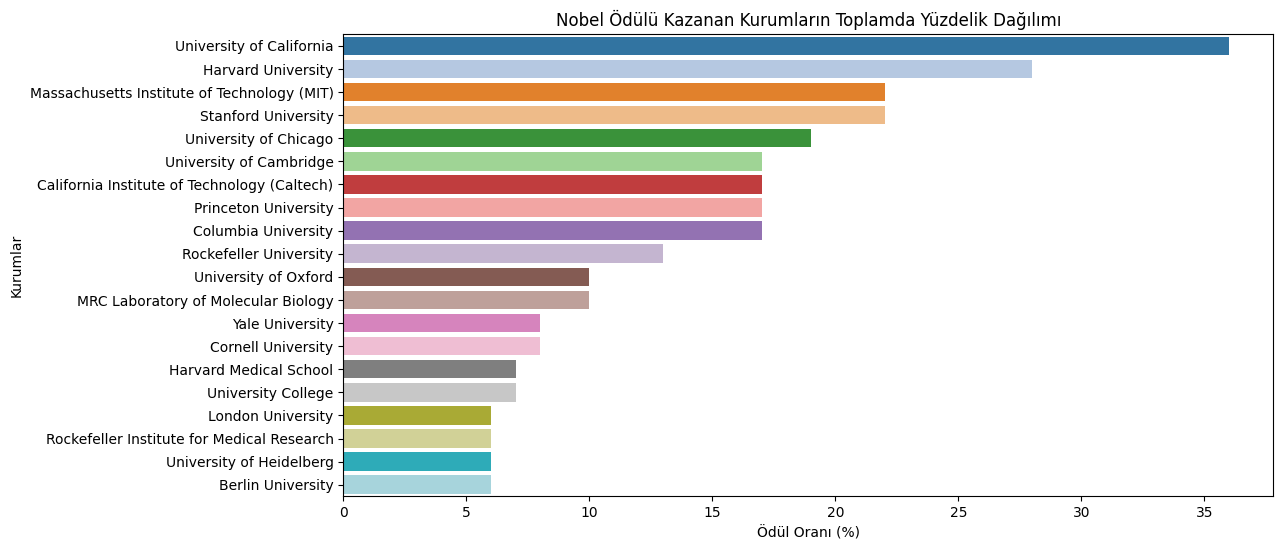

In [ ]:
# En çok ödül kazanan 20 kurumu seç ve yüzdelik gösterim yap
top_20_organization_total = df[df['organization_name'] != 'unknown']['organization_name'].value_counts().head(20)

# Grafik
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_organization_total.values, y=top_20_organization_total.index, palette="tab20")

plt.title("Nobel Ödülü Kazanan Kurumların Toplamda Yüzdelik Dağılımı")
plt.xlabel("Ödül Oranı (%)")
plt.ylabel("Kurumlar")
plt.show()


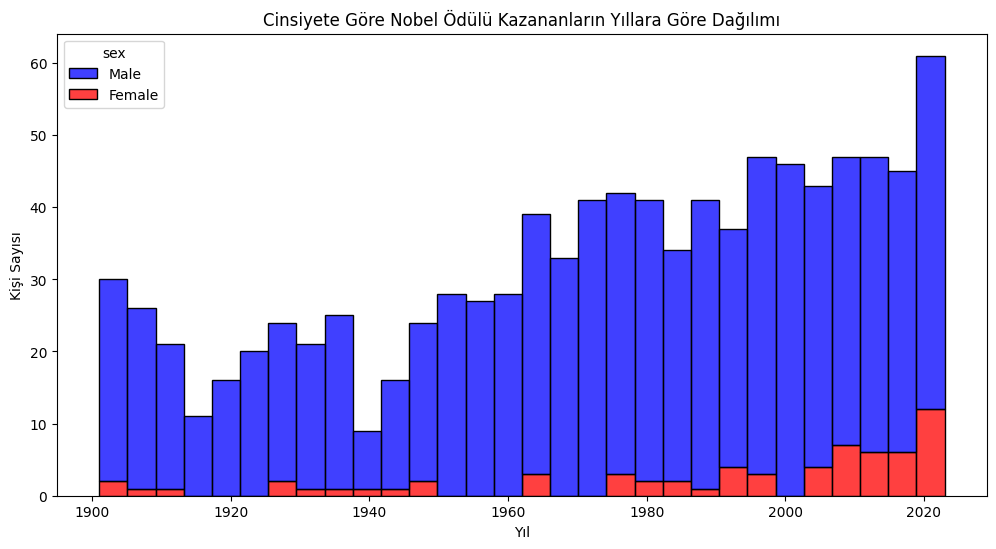

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["sex"] != "unknown"], x="year", hue="sex", multiple="stack", bins=30, palette={"Male": "blue", "Female": "red"})
plt.title("Cinsiyete Göre Nobel Ödülü Kazananların Yıllara Göre Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Kişi Sayısı")
plt.show()


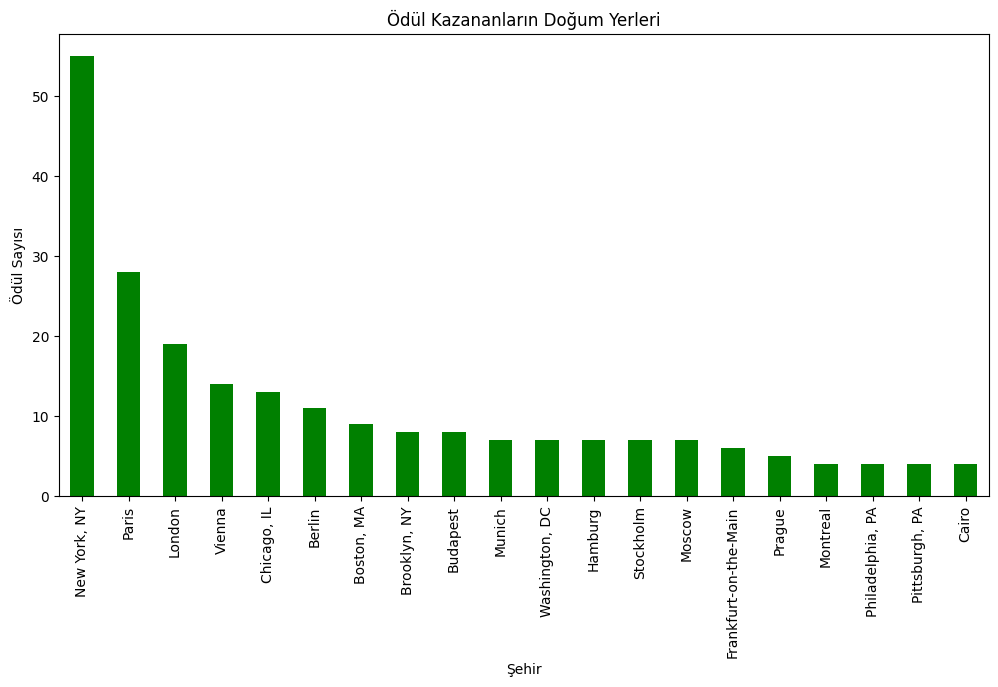

In [ ]:
plt.figure(figsize=(12, 6))
df[df['birth_city'] != 'unknown']['birth_city'].value_counts().head(20).plot(kind='bar', color='green')
plt.title("Ödül Kazananların Doğum Yerleri")
plt.xlabel("Şehir")
plt.ylabel("Ödül Sayısı")
plt.xticks(rotation=90)
plt.show()


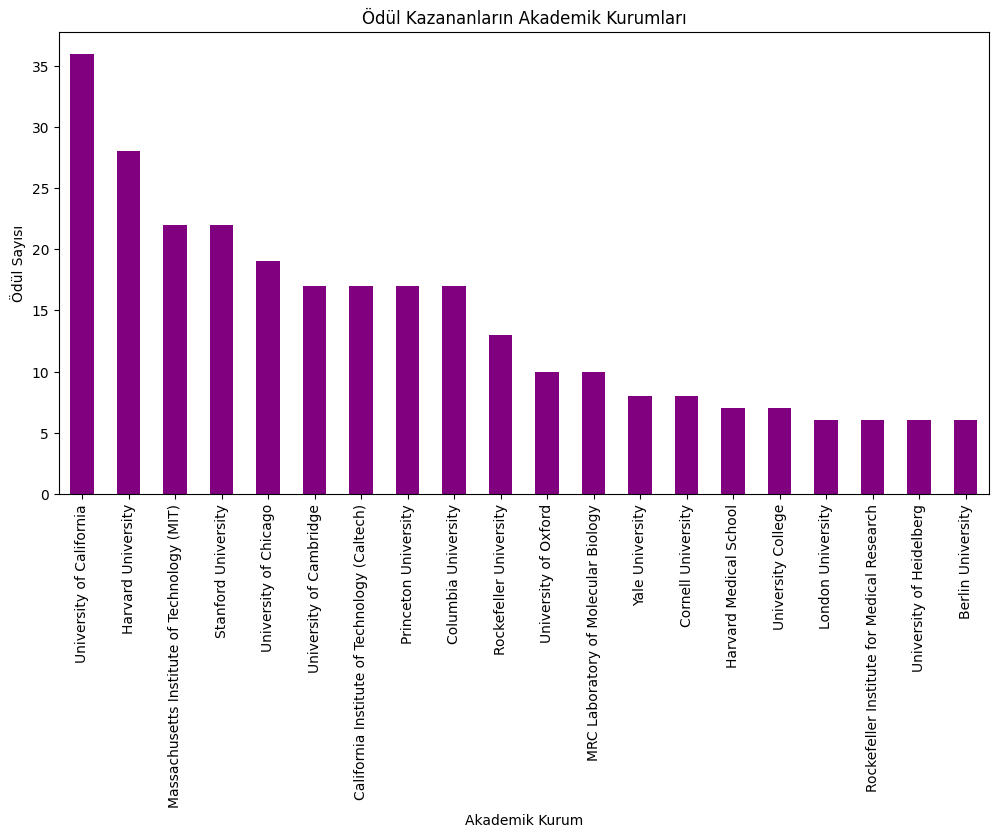

In [ ]:
plt.figure(figsize=(12, 6))
df[df['organization_name'] != 'unknown']['organization_name'].value_counts().head(20).plot(kind='bar', color='purple')
plt.title("Ödül Kazananların Akademik Kurumları")
plt.xlabel("Akademik Kurum")
plt.ylabel("Ödül Sayısı")
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

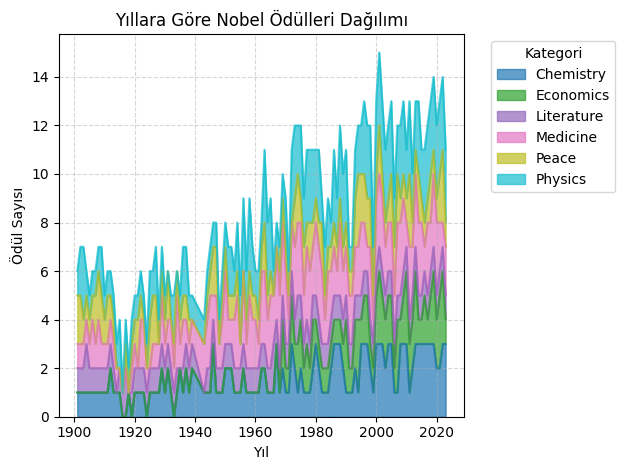

In [ ]:
# Tarih sütununu doğru formatla
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Yıl ve kategoriye göre ödül sayısını hesapla
category_counts = df.groupby(["year", "category"]).size().unstack()

# Grafik: Yıllara göre ödül kategorileri
plt.figure(figsize=(12, 6))
category_counts.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7)

# Başlık ve etiketler
plt.title("Yıllara Göre Nobel Ödülleri Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Ödül Sayısı")
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)

# Grafik göster
plt.tight_layout()
plt.show()


In [ ]:
# Nobel yaşını int türüne dönüştürme
df['nobel_age'] = df['nobel_age'].astype(int)

# Değişikliği kontrol et
df[['nobel_age']].head()

,nobel_age
0,49
1,62
2,47
3,73
4,79


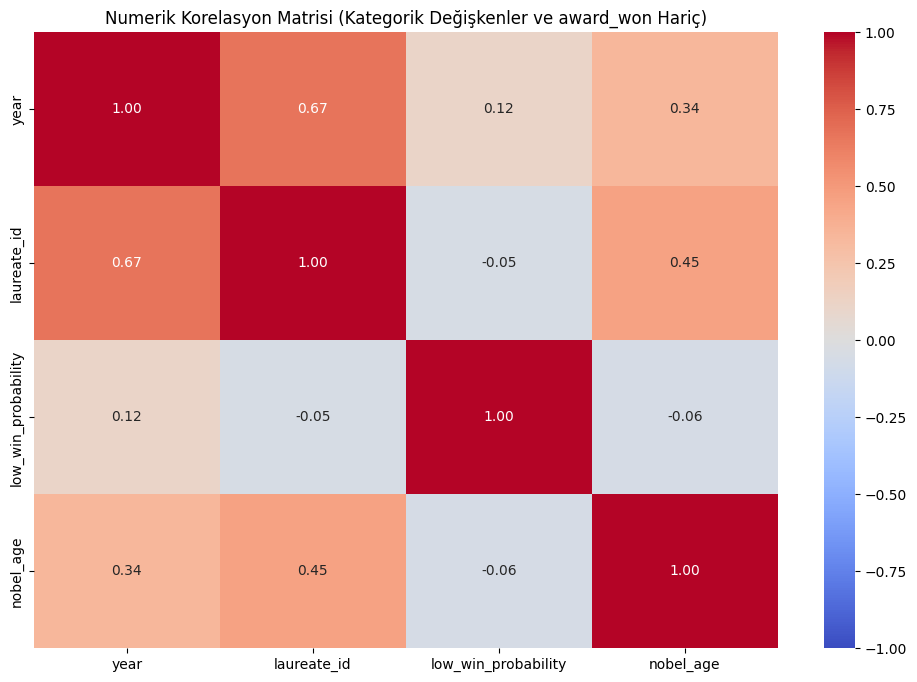

In [ ]:
# Kategorik olan ve 'award_won' gibi sütunları çıkartalım
columns_to_drop = ['award_won', 'sex', 'birth_country', 'organization_name', 'organization_city', 'organization_country', 'motivation']
df_numeric = df.drop(columns=columns_to_drop).select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplıyoruz
corr_matrix = df_numeric.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title("Numerik Korelasyon Matrisi (Kategorik Değişkenler ve award_won Hariç)")
plt.show()


In [ ]:
df.dtypes

,0
year,int64
category,object
prize,object
motivation,object
prize_share,object
laureate_id,int64
laureate_type,object
full_name,object
birth_date,object
birth_city,object


In [ ]:
df_new = df.drop(columns=['category', 'prize', 'motivation', 'full_name'])

In [ ]:
df_new = df_new.drop(columns=['prize_share', 'award_won'])

In [ ]:
# Kategorik değişkenlerde en fazla 20 değeri alalım, geri kalanları "other" yapalım
def handle_top_20(data, column):
    top_20 = data[column].value_counts().head(20).index
    data[column] = data[column].apply(lambda x: x if x in top_20 else 'other')
    return data

# Kategorik değişkenler
categorical_columns = ['sex', 'birth_country','birth_date', 'birth_city', 'organization_name','organization_city', 'organization_country', 'laureate_type']

# Top 20'yi alıp "other" ile değiştirme
for col in categorical_columns:
    df = handle_top_20(df, col)


In [ ]:
for col in categorical_columns:
    df_new = handle_top_20(df_new, col)

In [ ]:
# One-Hot Encoding
#df_new = pd.get_dummies(df_new, columns=['sex', 'birth_country','birth_date', 'birth_city', 'organization_name','organization_city', 'organization_country', 'laureate_type'], drop_first=True)


In [ ]:
# yukarıdaki kodu çalıştırdım normalde ama yanlışlıkla bir daha çalıştırınca hata verdi o yüzden yorum satırına aldım.

In [ ]:
# Boolean sütunları int64'e dönüştürme
df = df_new.astype({col: 'int64' for col in df.select_dtypes(include='bool').columns})

In [ ]:
df.dtypes

,0
year,int64
laureate_id,int64
low_win_probability,int64
nobel_age,int64
sex_Male,int64
...,...
organization_country_United Kingdom,int64
organization_country_United States of America,int64
organization_country_other,int64
organization_country_unknown,int64


Modelleme

In [ ]:
from sklearn.model_selection import train_test_split

# Özellikler (features) ve hedef (target) değişkeni ayrılıyor
X = df.drop('low_win_probability', axis=1)  # 'low_win_probability' hedef değişkeni
y = df['low_win_probability']  # 'low_win_probability' hedef değişkeni

# Eğitim ve test kümelerine bölme (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def evaluate_models(X_train, X_test, y_train, y_test):
    # Modellerin bir listesini oluşturuyoruz
    models = [
        ("Logistic Regression", LogisticRegression(max_iter=1000)),
        ("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("Random Forest", RandomForestClassifier(random_state=42))
    ]

    # Her bir modeli sırasıyla eğitip sonuçlarını yazdırıyoruz
    for name, model in models:
        # Modeli eğitim verisi ile eğitme
        model.fit(X_train, y_train)

        # Test verisi üzerinde tahmin yapma
        y_pred = model.predict(X_test)

        # Modelin başarımını değerlendirme
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Sonuçları yazdırma
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("Classification Report:\n", report)
        print("="*50)

# Modeli test etmek için fonksiyonu çağırıyoruz
evaluate_models(X_train, X_test, y_train, y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 98.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.96      0.98      0.97        47

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200

Model: Decision Tree
Accuracy: 96.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       153
           1       0.87      0.98      0.92        47

    accuracy                           0.96       200
   macro avg       0.93      0.97      0.95       200
weighted avg       0.96      0.96      0.96       200

Model: Random Forest
Accuracy: 97.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.90      0.98      0.94  

In [ ]:
from sklearn.model_selection import cross_val_score

def evaluate_models_cv(X, y, k=5):
    # Modellerin bir listesini oluşturuyoruz
    models = [
        ("Logistic Regression", LogisticRegression(max_iter=1000)),
        ("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("Random Forest", RandomForestClassifier(random_state=42))
    ]

    # Her bir modeli sırasıyla eğitip çapraz doğrulama yapıyoruz
    for name, model in models:
        # K-katlı çapraz doğrulama ile modelin doğruluğunu hesaplama
        cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

        # Sonuçları yazdırma
        print(f"Model: {name}")
        print(f"Cross-validation accuracy (mean): {cv_scores.mean() * 100:.2f}%")
        print(f"Cross-validation accuracy (std): {cv_scores.std() * 100:.2f}%")
        print("="*50)

# K-katlı çapraz doğrulama ile modelleri test etme
evaluate_models_cv(X, y, k=5)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: Logistic Regression
Cross-validation accuracy (mean): 98.10%
Cross-validation accuracy (std): 1.24%
Model: Decision Tree
Cross-validation accuracy (mean): 93.00%
Cross-validation accuracy (std): 8.15%
Model: Random Forest
Cross-validation accuracy (mean): 96.90%
Cross-validation accuracy (std): 2.29%


Feature Importance

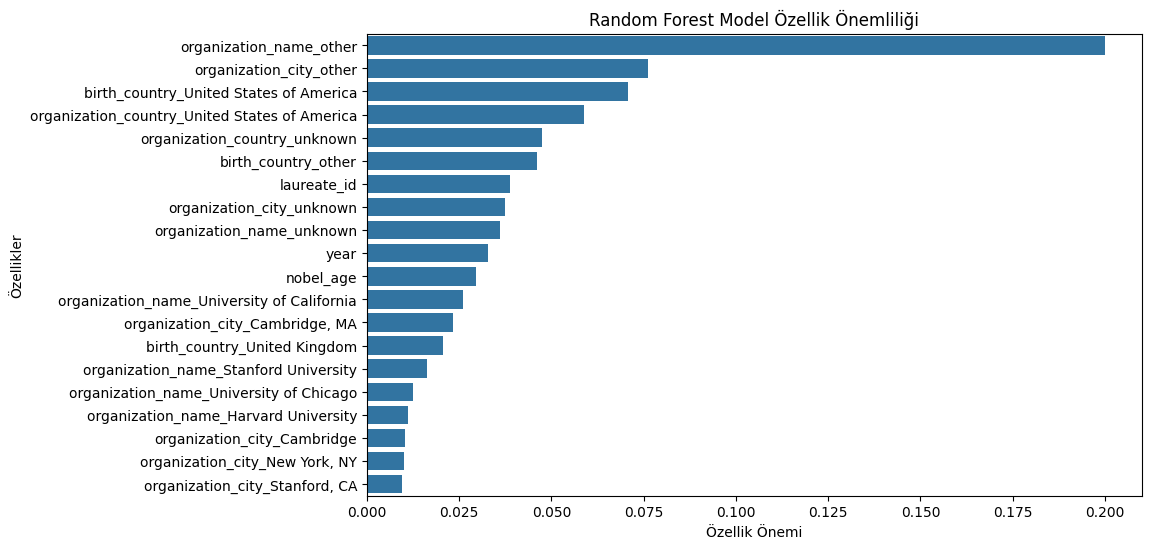

In [ ]:
def plot_feature_importance(X, y):
    # Random Forest modelini eğitiyoruz
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X, y)

    # Özelliklerin önem derecelerini alıyoruz
    feature_importances = rf_model.feature_importances_

    # Özelliklerin isimlerini alıyoruz
    feature_names = X.columns

    # Özellikleri önem sırasına göre sıralıyoruz
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Özellikleri azalan sırayla sıralıyoruz
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Top 20 özellik
    top_20_features = importance_df.head(20)

    # Görselleştirme
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_20_features)
    plt.title("Random Forest Model Özellik Önemliliği")
    plt.xlabel("Özellik Önemi")
    plt.ylabel("Özellikler")
    plt.show()

# Özelliklerin önem derecelerini görselleştirme
plot_feature_importance(X, y)

In [ ]:
# Verisetinden rastgele bir gözlem seç
random_index = np.random.choice(X.index)

# Seçilen gözlemi çıkaralım
random_sample = X.loc[random_index]
random_label = y.loc[random_index]

# Modeli tekrar eğitelim (örneğin, RandomForest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Rastgele gözlem için tahmin yapalım
prediction = rf_model.predict([random_sample])[0]

# Sonuçları gösterelim
print(f"Gerçek Etiket (Low Win Probability): {random_label}")
print(f"Model Tahmini: {prediction}")

# Ayrıca, tahminin doğru olup olmadığını kontrol edebiliriz:
if prediction == random_label:
    print("Tahmin doğru!")
else:
    print("Tahmin yanlış!")


Gerçek Etiket (Low Win Probability): 1
Model Tahmini: 1
Tahmin doğru!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
